#  Ford Gobike Data Analysis

#### By 
  ## Khalid AlRebdi

### Investigation Overview
This project will include visualization and insights of the Ford Gobike system dataset.

### Dataset Overview
data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [67]:
#Importing all needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [68]:
#Loading the data into the dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [69]:
print(df.shape)
print('--------------------------')
print('--------------------------')
print(df.dtypes)
print('--------------------------')
print('--------------------------')
print(df.head(10))

(519700, 13)
--------------------------
--------------------------
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object
--------------------------
--------------------------
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 0

In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [71]:
#Making sure that there is no duplicate
sum(df.duplicated())

0

In [72]:
#count of null values per attribute
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [73]:
#changing data type of start and end time to be datetime64(ns) 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)


In [74]:
#Making sure of the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 51.5+ MB


In [75]:
#using the (describe) function to learn more about the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


### What is the structure of your dataset?##


There are 519700 data trips for fordgobike started in 2017 the dataset with 13 features:
{duration_sec - start_time -	end_time -	start_station_id -	start_station_name -	start_station_latitude	-start_station_longitude -	end_station_id -	end_station_name -	end_station_latitude -	end_station_longitude -	bike_id	 - user_type}.
Types of the features: datetime64 (2), float64(4), int64(4), object(3).


### What is the main intrest in this exploration?###

1- rides per week starting from week 26 to 52.
2- trips on different days.
3- Rides per user type.
4- Trip Duration per weekdays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


1- duration_sec.
2- user_type.
3- Start_time 
4- end_time 

### Univariate Exploration

In [76]:
df['week']=pd.DatetimeIndex(df['start_time']).week
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,week
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,52
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,52
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,52
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,52
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,52
5,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,52
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,52
7,4334,2017-12-31 23:46:37.196,2018-01-01 00:58:51.211,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,52
8,4150,2017-12-31 23:37:07.548,2018-01-01 00:46:18.308,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,52
9,4238,2017-12-31 23:35:38.145,2018-01-01 00:46:17.053,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,52


## ( Number of rides based on user type )

> this shows the number of rides based on the user type ( subscriber - customer) , the subscriber is way more than the customer

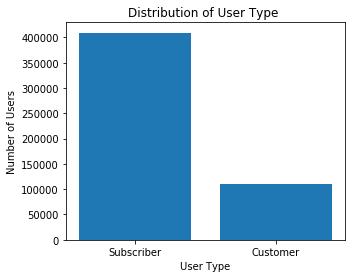

In [77]:
# plotting types of users 
plt.figure(figsize=[5,4])
plt.bar(x=df.user_type.value_counts().keys(),height=df.user_type.value_counts())
plt.title('Distribution of User Type ')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

It looks like most of the trips belongs to Subscribers.

## Count of rides per week (26 - 52)

> This visual will show the count of rides per week from week 26 to 52.

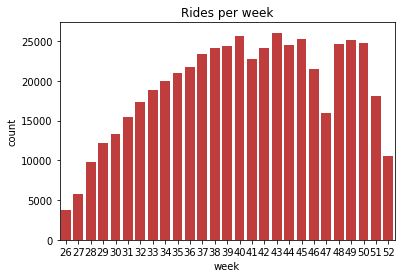

In [78]:
sns.countplot(data=df ,x='week', color=sns.color_palette()[3])
plt.title('Rides per week');

Looks like the week 43 has the most rides.

## Trips per day

> this shows the number of trip on each day of a week , the maximum trips is on the Wednesday and Tuesday

In [79]:
df.start_time=pd.to_datetime(df.start_time)
df['trip_day']=df.start_time.dt.strftime('%a')

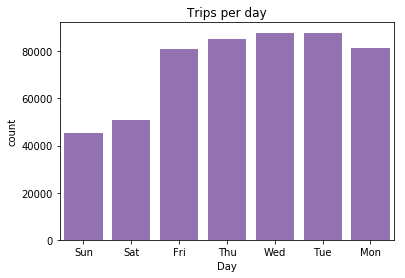

In [80]:
sns.countplot(data=df, x='trip_day',color=sns.color_palette()[4]);
plt.xlabel('Day')
plt.title('Trips per day');

Obviously, There are less trips on Sunday & Saturaday.
Rest of the days have close numbers.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

No, there is no need for any transformation.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, the data is not tidy so I had to adujst some features like weeks.

## Bivariate Exploration

## investigating the relation between weeks & user_type.

> This visual will show number of rides in weekdays based on user type.
Obviously, Subscribers take more trips on the working days while customers on the weekend.

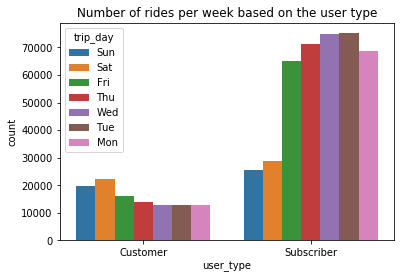

In [81]:
sns.countplot(data=df, x='user_type',hue='trip_day')
plt.title('Number of rides per week based on the user type');

Its clear that customers usually comes on the weekend while subscribers oftenly on the other days.

## investigating the relation between the weekday usage of bike in secondes

> This visual will show the average duration in seconds per weekday. obviously, trips on the weekend should differs than trips on the working days.

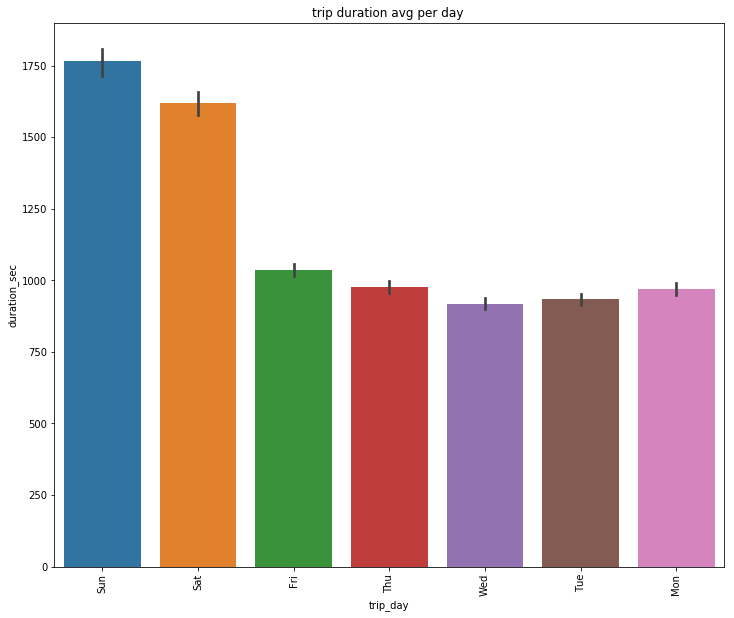

In [82]:
plt.figure(figsize = [12, 10])
plt.title('trip duration avg per day ');
sns.barplot(data = df, x = 'trip_day', y = 'duration_sec')
plt.xticks(rotation=90)
plt.show()

Its clear that trips last longer on the weekend.

### Average of the trip duration based on user type

> This will show what is the average trip duration per user type.

Text(0.5, 0, 'trip duration by seconds')

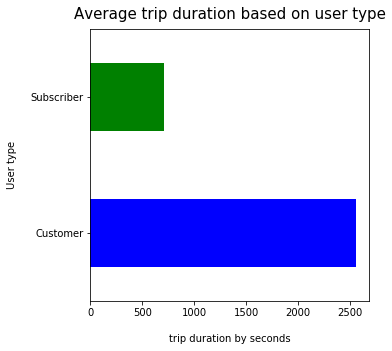

In [83]:
new_color=['blue','green']
ax =df.groupby('user_type')['duration_sec'].mean().plot(kind='barh',color=new_color, figsize=(5,5))
ax.set_title('Average trip duration based on user type', fontsize=15, y=1.014)
ax.set_ylabel('User type', labelpad=13)
ax.set_xlabel('trip duration by seconds', labelpad=16)

Customers trips last four times more than subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Customers comes usually on the weekends and have way longer trips than subscribers.
- Most Subscribers' trips are on the working days and it last much less the customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No.

## Multivariate Exploration

## Trip Duration per weekday based on the user type

> This visual will clarfy the difference of trip durations between customer and Subscriber.

Text(0.5, 0.98, 'Trip Duration VS Weekday based on User type')

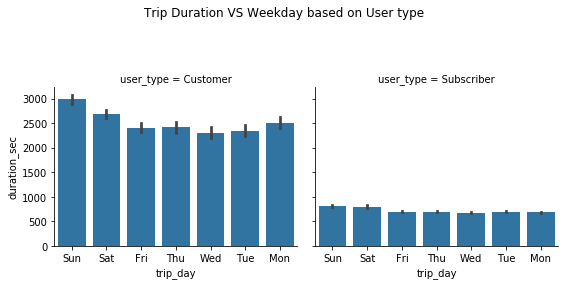

In [84]:
g=sns.FacetGrid(df, col="user_type", height=4, aspect=1)
g.map(sns.barplot, "trip_day", "duration_sec");
plt.subplots_adjust(top=0.7)
g.fig.suptitle('Trip Duration VS Weekday based on User type')

Subscribers duration are almost the same every day with a slight increase on weekends whereas trips of customers last noticebly longer on sunday.

## Trip duration based on the user type

> This visual is a line chart that will clearfy the trip duration difference per day between customers and subscribers.

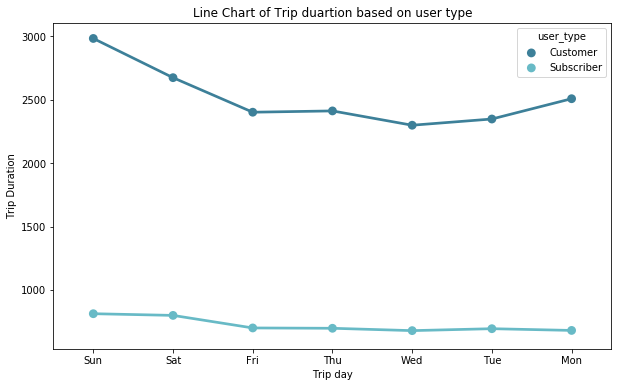

In [85]:
plt2 = plt.figure(figsize = [10,6])
sns.pointplot(data =df,x = 'trip_day', y ='duration_sec', hue = 'user_type', palette = 'GnBu_d', high='10' ,ci=None)
plt.title('Line Chart of Trip duartion based on user type')
plt.ylabel('Trip Duration')
plt.xlabel('Trip day')
plt.show();

## Number of Trips per the top 10 starting stations.

> This visual will show the top 10 stations that started trips.

In [86]:

subs = df.query('user_type == "Subscriber"').start_station_name.value_counts()
cust = df.query('user_type == "Customer"').start_station_name.value_counts()
top_station = df.start_station_name.value_counts()
y=top_station.values[0:10] 
x= top_station.index[0:10]

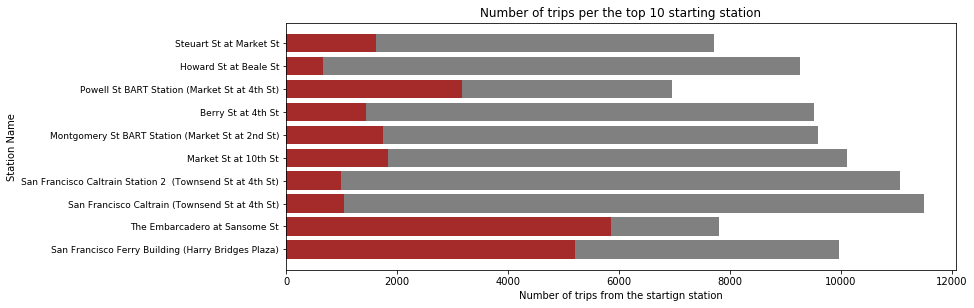

In [87]:
plt.figure(figsize = [12, 10] ) 
plt.subplot(2,1,1)
plt.barh(x,subs[x],color='grey')
plt.barh(x,cust[x],color='brown')
plt.yticks(fontsize=9)
plt.title('Number of trips per the top 10 starting station')
plt.xlabel('Number of trips from the startign station')
plt.ylabel('Station Name');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The day of the week feature is very important to the User_type feature because we expect many customers on the weekends whereas subscribers trips usually on the working days.
- Trip duration is highly affected by the user_type, we should expect the trip to be longer if the user is a customer.


### Were there any interesting or surprising interactions between features?


Yes, the huge duration gap between customers and subscribers.

In [89]:
!jupyter nbconvert FordGobikeDataExplantory.ipynb --to slides --post serve --template output_toggle

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | pattern 'FordGobikeDataExplantory.ipynb' matched no files
